In [2]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [1]:
import os

# Path to the dataset folder
data_path = 'stock'

# List all files in the folder to confirm access
files = os.listdir(data_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'stock_metadata.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']


In [2]:
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

Python executable: c:\Users\ASUS\AppData\Local\Programs\Python\Python313\python.exe
Python version: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]


In [3]:
import pandas as pd
print(pd.__version__)


2.2.3


In [4]:
import pandas as pd

dataset_file = os.path.join(data_path, 'ADANIPORTS.csv')  # Replace with your actual file name
df = pd.read_csv(dataset_file)
print(df.head())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date', inplace=True)


In [9]:
print("Missing values in dataset:", df.isnull().sum())


Missing values in dataset: Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


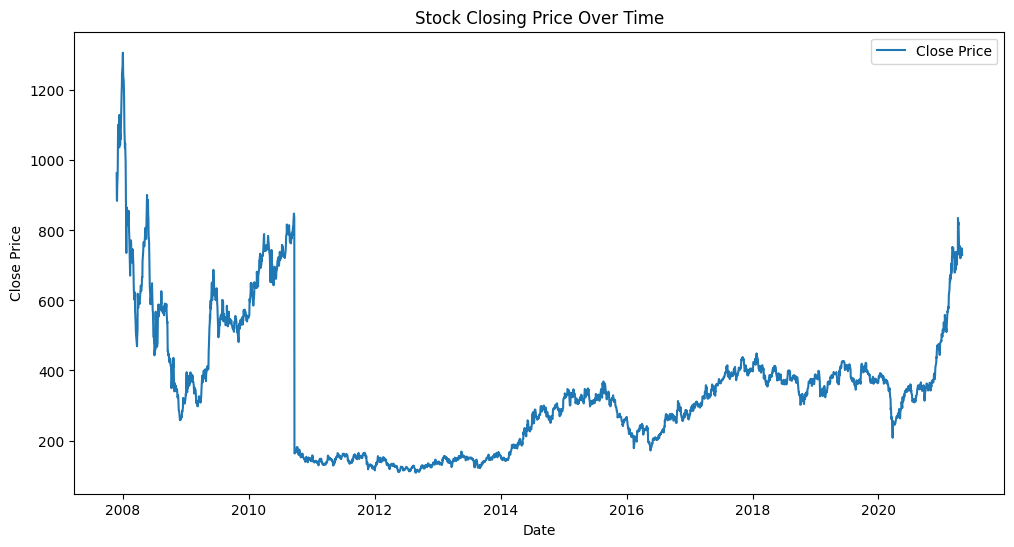

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [11]:
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
df['100_day_MA'] = df['Close'].rolling(window=100).mean()

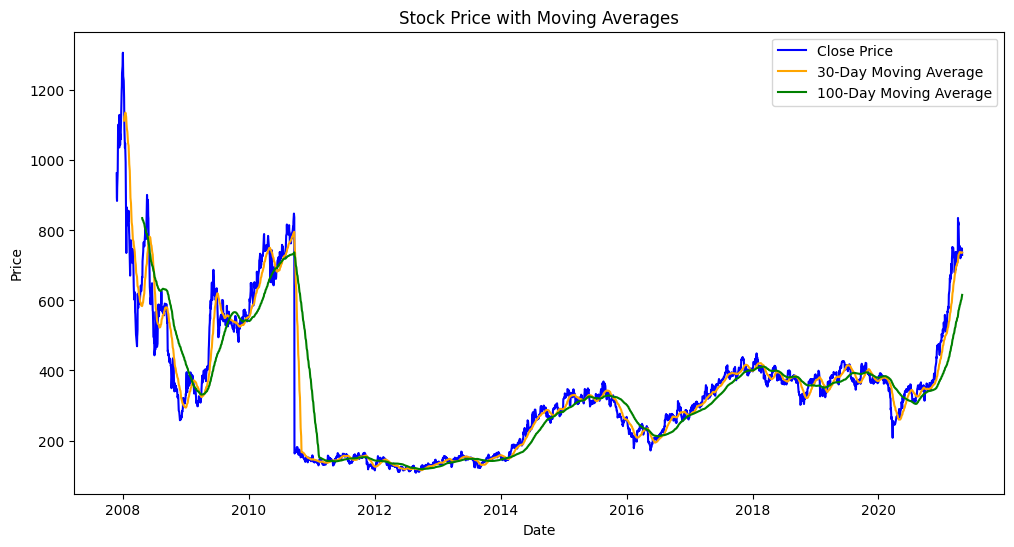

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.plot(df['100_day_MA'], label='100-Day Moving Average', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

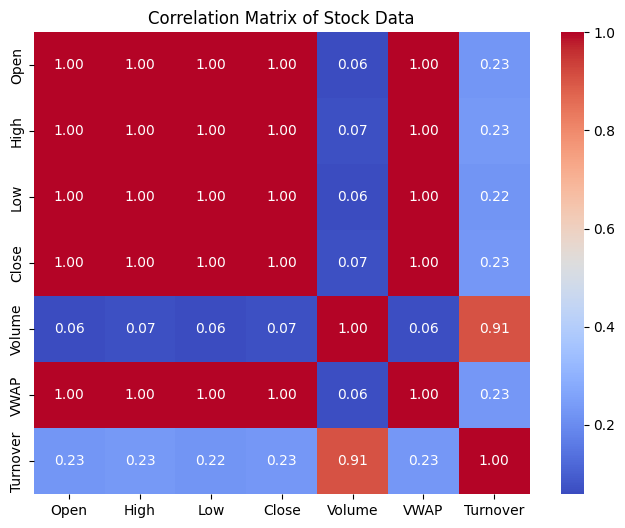

In [13]:
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Turnover']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Stock Data')
plt.show()

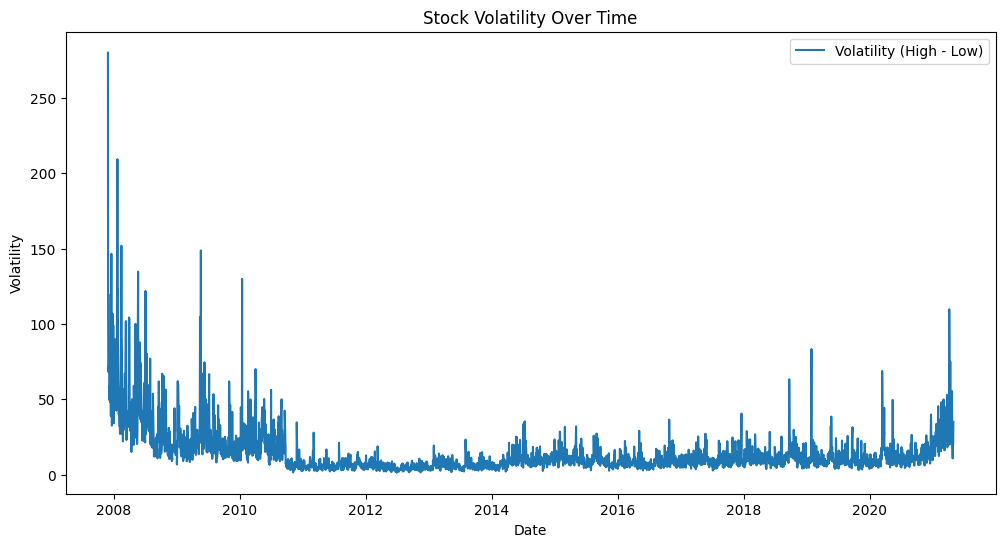

In [14]:
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='Volatility (High - Low)')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [15]:
df['Pct_Change'] = df['Close'].pct_change() * 100

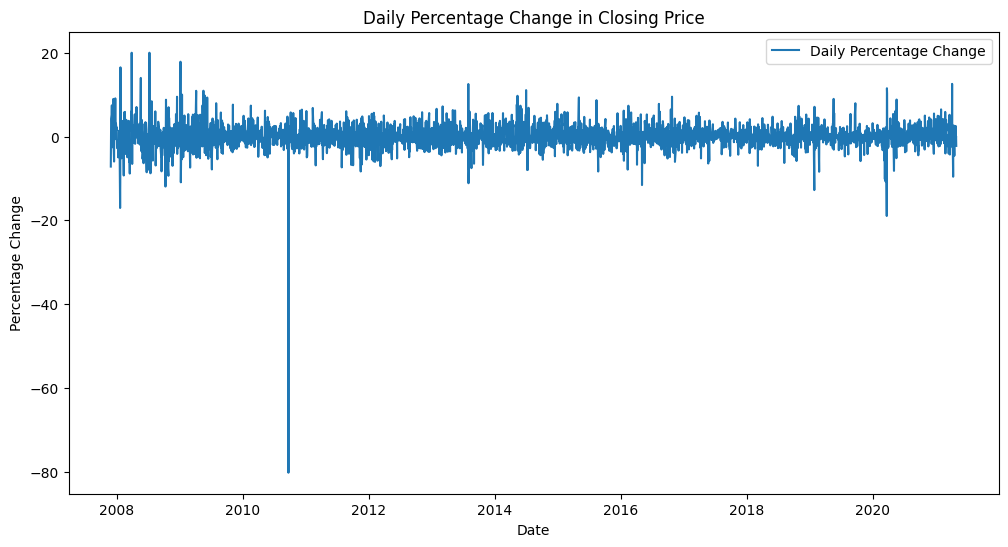

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Pct_Change'], label='Daily Percentage Change')
plt.title('Daily Percentage Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

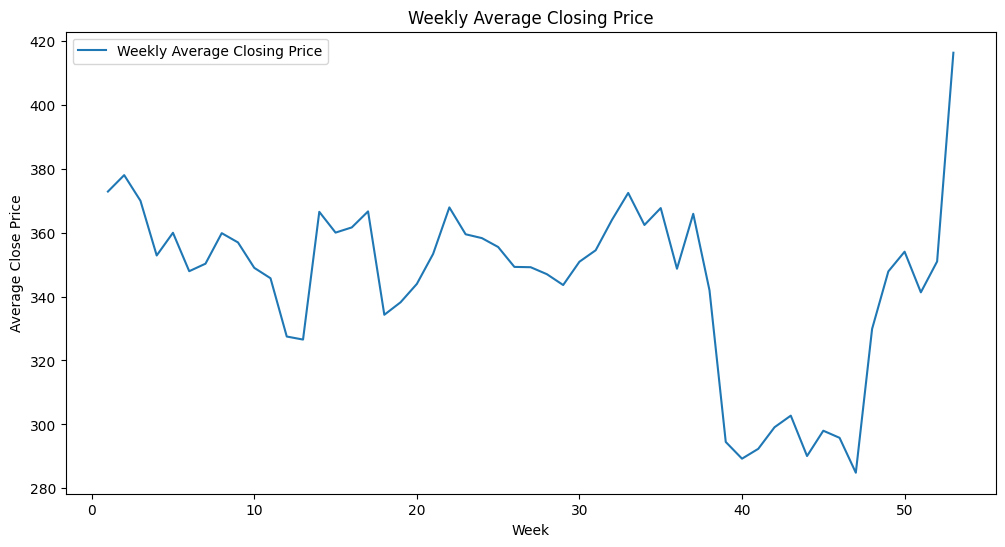

In [17]:
df['Week'] = df.index.isocalendar().week
weekly_avg = df.groupby('Week')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_avg, label='Weekly Average Closing Price')
plt.title('Weekly Average Closing Price')
plt.xlabel('Week')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

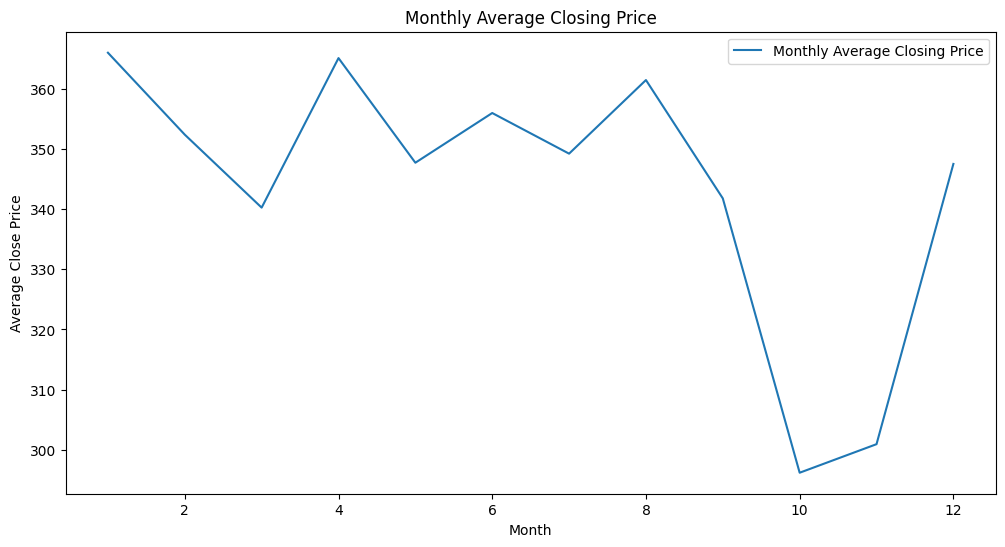

In [18]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg, label='Monthly Average Closing Price')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

In [19]:
import pandas as pd
import plotly.express as px

In [20]:
data_path = 'stock'
files = os.listdir(data_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'stock_metadata.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv']


In [21]:
data_path = 'stock'  # Path to the directory containing CSV files
# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Check if any CSV files were found
if csv_files:
    # Construct the full path to the first CSV file
    file_path = os.path.join(data_path, csv_files[0])
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    # Display the first 5 rows of the DataFrame
    print(df.head())
else:
    print("No CSV files found in the directory.")

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [22]:
df['Date'] = pd.to_datetime(df['Date'])


In [23]:
# import plotly.io as pio
# pio.renderers.default = "browser"  # This will use your web browser for rendering


In [24]:
# import plotly.express as px

# # Sample data for testing
# df = px.data.gapminder()

# fig = px.scatter(df, x='gdpPercap', y='lifeExp', color='continent', size='pop', hover_name='country', log_x=True, size_max=60)
# fig.update_layout(title='GDP vs Life Expectancy')
# fig.show()  # This should render in your browser if set to "browser"


In [25]:
print(df.columns)


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [26]:
fig = px.line(df, x='Date', y='Close', title='Stock Closing Price Over Time',
              labels={'Close': 'Closing Price', 'Date': 'Date'})

# Add hover data to display values
fig.update_traces(hovertemplate='Date: %{x}<br>Close: %{y}')

# Customize layout for better interactivity
fig.update_layout(
    hovermode='x unified',  # Show tooltip for x-axis alignment
    xaxis_title="Date",
    yaxis_title="Close Price",
    template="plotly_dark"  # Optional theme
)

# Show the plot
fig.show()

In [38]:

dataset_file = os.path.join(data_path, 'ADANIPORTS.csv')  # Replace with your actual file name
df = pd.read_csv(dataset_file)
print(df.head())

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [39]:
print(df.head(10))


         Date      Symbol Series  Prev Close     Open     High     Low  \
0  2007-11-27  MUNDRAPORT     EQ      440.00   770.00  1050.00   770.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90   984.00   990.00   874.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90   909.00   914.75   841.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20   890.00   958.00   890.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55   939.75   995.00   922.0   
5  2007-12-04  MUNDRAPORT     EQ      969.30   985.00  1056.00   976.0   
6  2007-12-05  MUNDRAPORT     EQ     1041.45  1061.00  1099.50  1050.0   
7  2007-12-06  MUNDRAPORT     EQ     1082.45  1089.00  1109.70  1051.0   
8  2007-12-07  MUNDRAPORT     EQ     1081.30  1100.00  1134.00  1078.0   
9  2007-12-10  MUNDRAPORT     EQ     1102.40  1110.00  1110.00  1061.1   

      Last    Close     VWAP    Volume      Turnover  Trades  \
0   959.00   962.90   984.72  27294366  2.687719e+15     NaN   
1   885.00   893.90   941.38   4581338  4.312765e+14     

In [40]:
print(df.head())
print(df.columns)

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [43]:
# Print the first 10 rows of the data to examine the index and Close column
print(df.head(10))

# Check the data types of the index and the Close column
print(df.index)
print(df['Close'].dtype)


         Date      Symbol Series  Prev Close     Open     High     Low  \
0  2007-11-27  MUNDRAPORT     EQ      440.00   770.00  1050.00   770.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90   984.00   990.00   874.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90   909.00   914.75   841.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20   890.00   958.00   890.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55   939.75   995.00   922.0   
5  2007-12-04  MUNDRAPORT     EQ      969.30   985.00  1056.00   976.0   
6  2007-12-05  MUNDRAPORT     EQ     1041.45  1061.00  1099.50  1050.0   
7  2007-12-06  MUNDRAPORT     EQ     1082.45  1089.00  1109.70  1051.0   
8  2007-12-07  MUNDRAPORT     EQ     1081.30  1100.00  1134.00  1078.0   
9  2007-12-10  MUNDRAPORT     EQ     1102.40  1110.00  1110.00  1061.1   

      Last    Close     VWAP    Volume      Turnover  Trades  \
0   959.00   962.90   984.72  27294366  2.687719e+15     NaN   
1   885.00   893.90   941.38   4581338  4.312765e+14     

In [44]:
# Check the minimum and maximum values in the index
print("Min date in the index:", df.index.min())
print("Max date in the index:", df.index.max())


Min date in the index: 0
Max date in the index: 3321


In [50]:

dataset_file = os.path.join(data_path, 'ADANIPORTS.csv')  # Replace with your actual file name
df = pd.read_csv(dataset_file)
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [53]:
import pandas as pd
import os

# Load your dataset
dataset_file = os.path.join(data_path, 'ADANIPORTS.csv')  # Replace with your actual file name
df = pd.read_csv(dataset_file)

# Check the first few rows to inspect the data and column names
print(df.head())

# Print the column names to identify the date column
print(df.columns)

# Assuming the date column is named 'Date' (adjust if the actual name is different)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' column to datetime format

# Now set the Date column as the index
df.set_index('Date', inplace=True)

# Check the first few rows again, especially the index
print(df.head())
print(df.index[:10])  # Should now show the correct datetime values, not 1970

# Optionally, check if the index is properly converted to datetime
print(df.index.dtype)  # Should show datetime64[ns]


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [54]:
print(df.index[:10])


DatetimeIndex(['2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30',
               '2007-12-03', '2007-12-04', '2007-12-05', '2007-12-06',
               '2007-12-07', '2007-12-10'],
              dtype='datetime64[ns]', name='Date', freq=None)


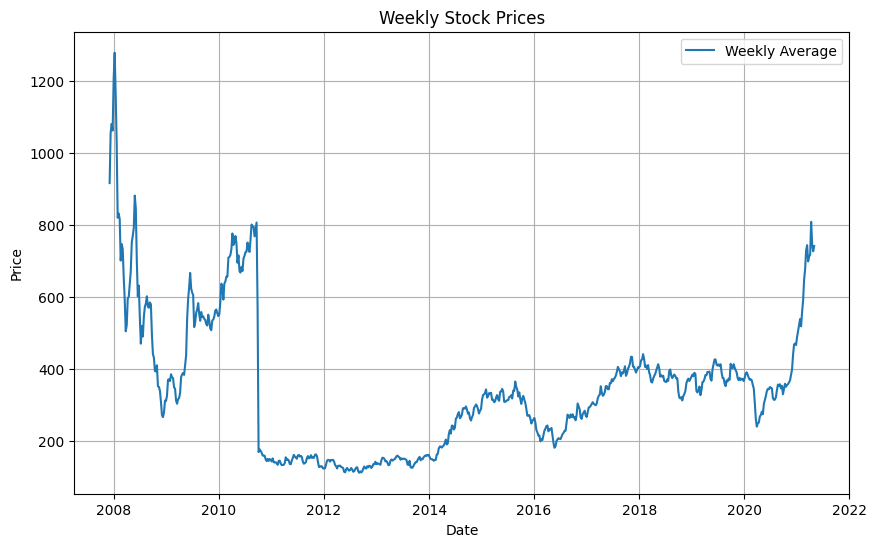

In [55]:
df.index = pd.to_datetime(df.index)


weekly_data = df['Close'].resample('W').mean()
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data, label='Weekly Average')
plt.title('Weekly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3371961902.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



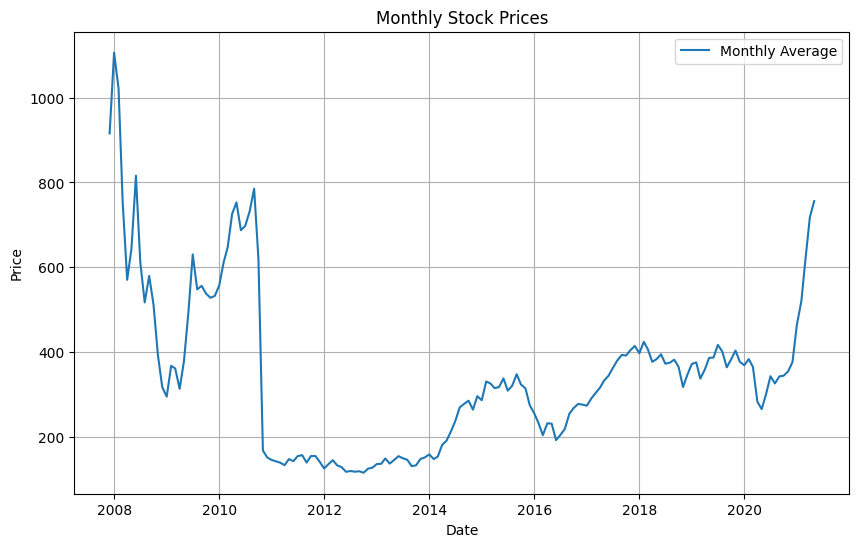

In [56]:
monthly_data = df['Close'].resample('M').mean()  # Resample data by month and calculate mean
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, label='Monthly Average')
plt.title('Monthly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


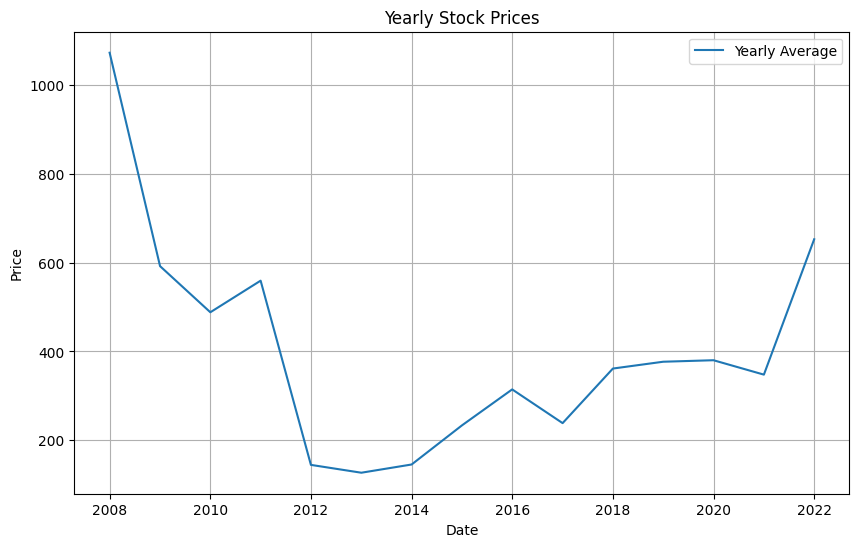

In [57]:
# Plot Yearly Data
yearly_data = df['Close'].resample('YE').mean()  # Resample data by year and calculate mean
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data, label='Yearly Average')
plt.title('Yearly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

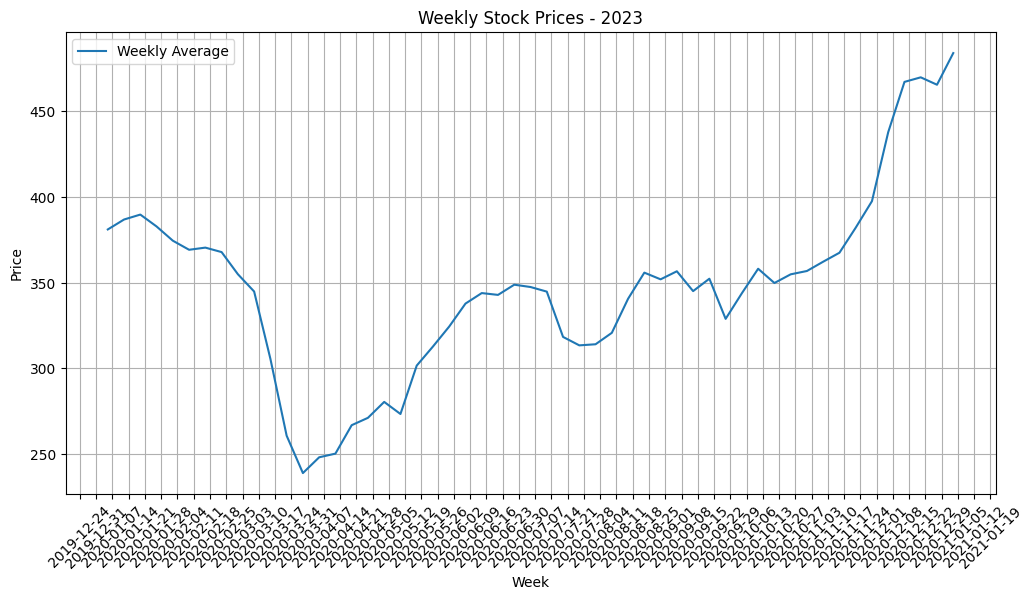

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter the data for the year 2023 (or any other year)
df_filtered = df[df.index.year == 2020]

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data, label='Weekly Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title('Weekly Stock Prices - 2023')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\1517433918.py:1: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\1517433918.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



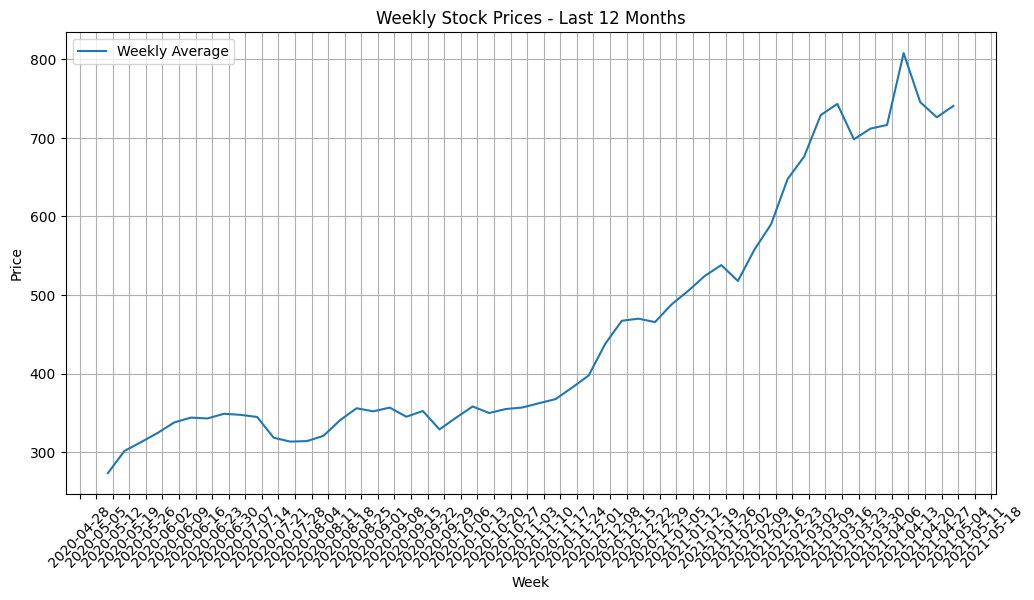

In [59]:
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data, label='Weekly Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\1938606533.py:6: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\1938606533.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



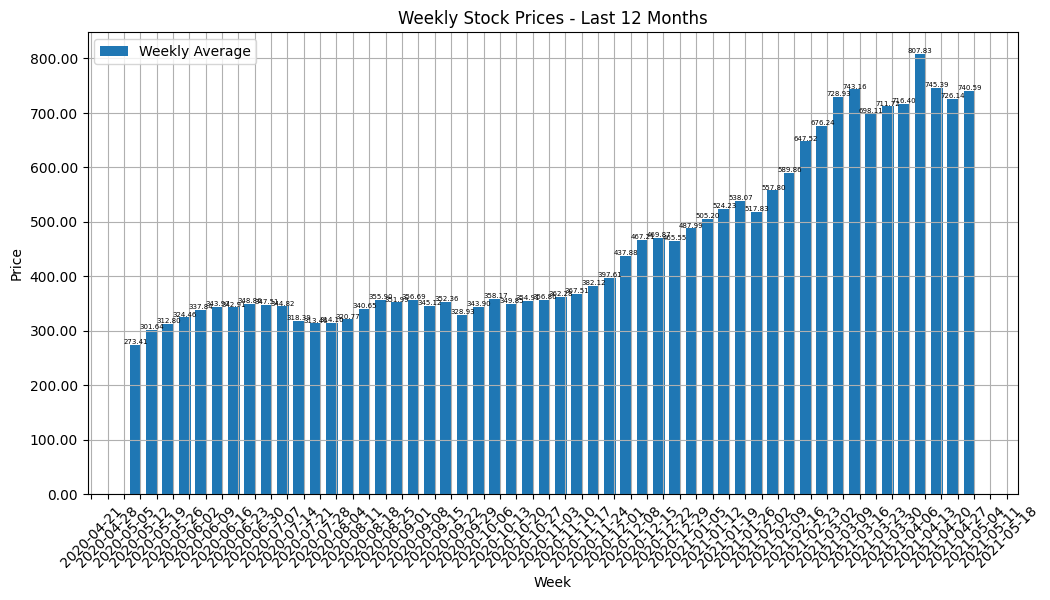

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 6 months
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

plt.figure(figsize=(12, 6))

# Create a bar graph
bars = plt.bar(weekly_data.index, weekly_data, label='Weekly Average', width=5)

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (price)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=5)  # Reduced font size

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\152813010.py:6: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\152813010.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\152813010.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



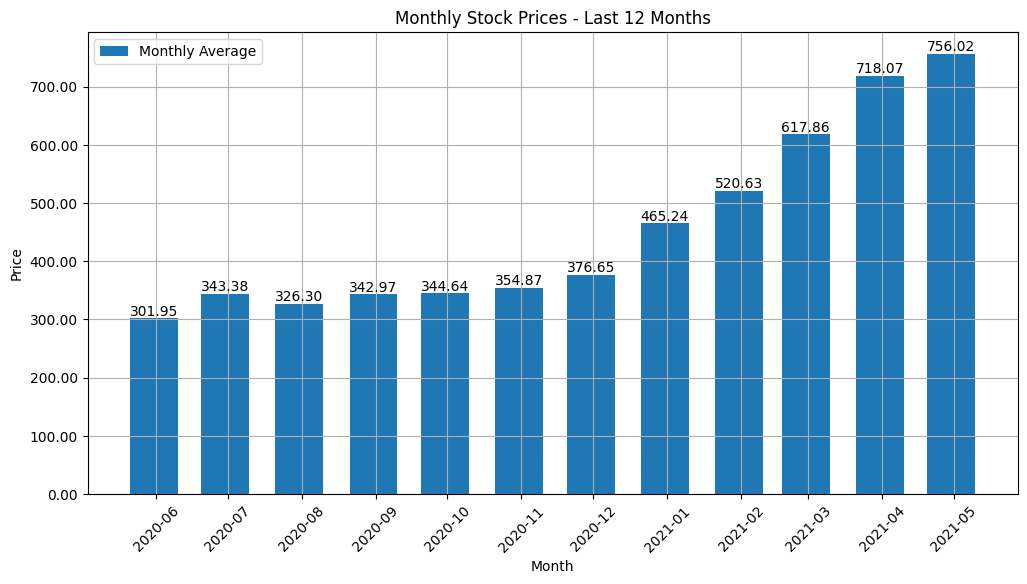

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))

# Create a bar graph
bars = plt.bar(monthly_data.index, monthly_data, label='Monthly Average', width=20)  # Adjust width for monthly bars

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (price)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)  # Reduced font size

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3929895130.py:6: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3929895130.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3929895130.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



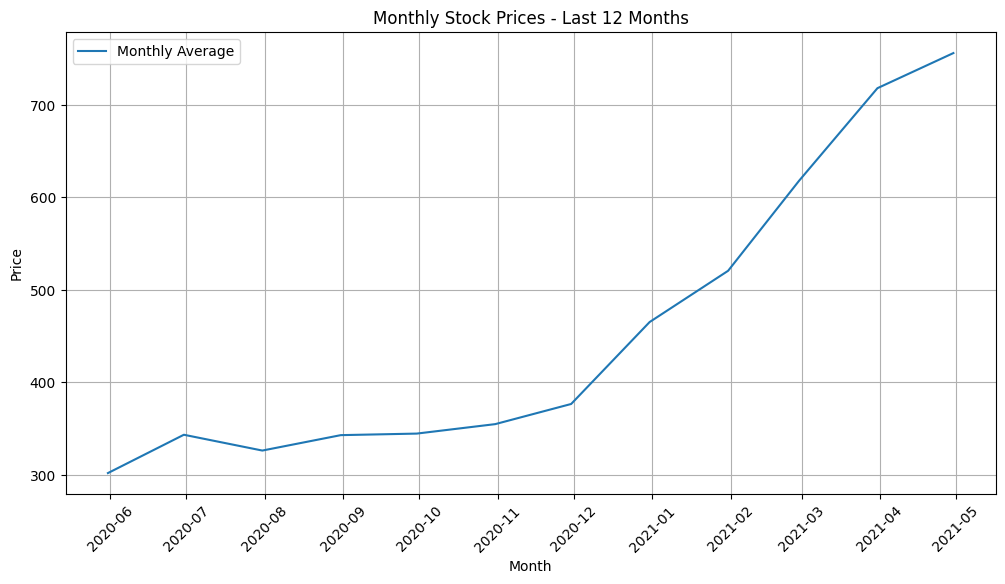

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))

# Create a line plot for monthly average prices
plt.plot(monthly_data.index, monthly_data, label='Monthly Average')

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3872682084.py:7: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3872682084.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



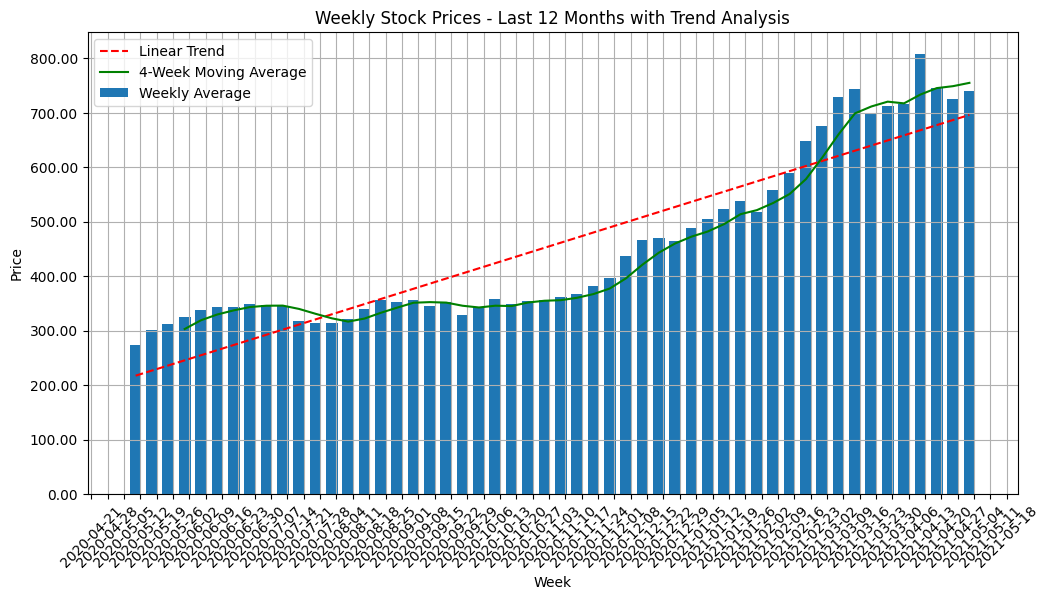

Trend Analysis Conclusion:
The stock price shows an upward trend over the last 12 months.
The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(weekly_data.index)  # Convert dates to numeric values for regression
y = weekly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = weekly_data.rolling(window=4).mean()  # 4-week moving average

plt.figure(figsize=(12, 6))

# Create a bar graph for weekly average
bars = plt.bar(weekly_data.index, weekly_data, label='Weekly Average', width=5)

# Plot the trend line
plt.plot(weekly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(weekly_data.index, rolling_mean, color='green', label='4-Week Moving Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# # Add the exact price on top of each bar with a smaller text size
# for bar in bars:
#     yval = bar.get_height()  # Get the height of each bar (price)
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=5)  # Reduced font size

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion
print("Trend Analysis Conclusion:")
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Assess the moving average trend
if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
    print("The 4-week moving average is trending upwards, indicating a recent positive momentum.")
elif rolling_mean.iloc[-1] < rolling_mean.iloc[0]:
    print("The 4-week moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\685170330.py:7: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\685170330.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\685170330.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



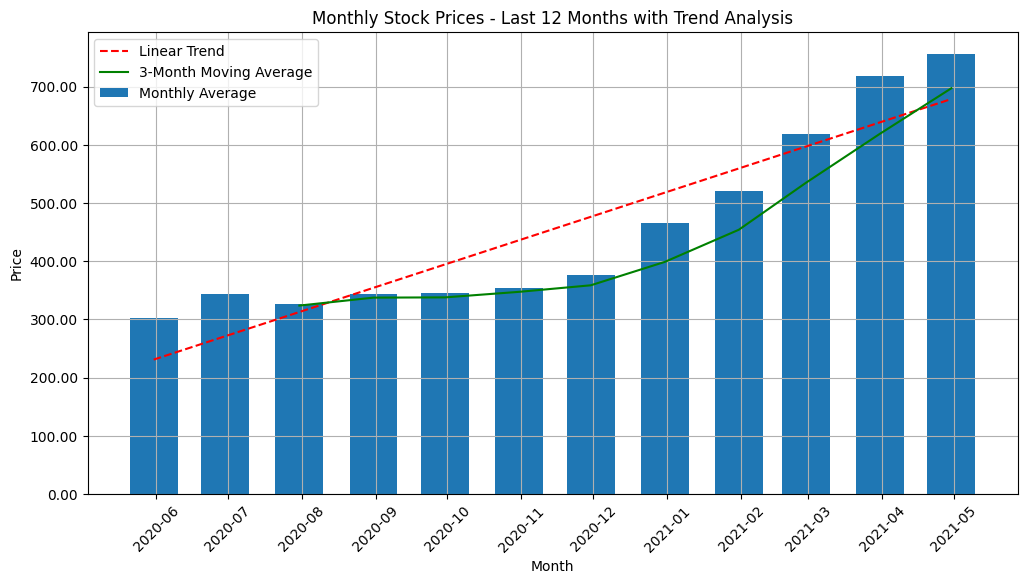

Trend Analysis Conclusion:
The stock price shows an upward trend over the last 12 months.
The 3-month moving average has remained flat, showing no significant momentum in the recent months.


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(monthly_data.index)  # Convert dates to numeric values for regression
y = monthly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = monthly_data.rolling(window=3).mean()  # 3-month moving average

plt.figure(figsize=(12, 6))

# Create a bar graph for monthly average
bars = plt.bar(monthly_data.index, monthly_data, label='Monthly Average', width=20)  # Adjust width for monthly bars

# Plot the trend line
plt.plot(monthly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(monthly_data.index, rolling_mean, color='green', label='3-Month Moving Average')

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
# for bar in bars:
#     yval = bar.get_height()  # Get the height of each bar (price)
#     plt.text(bar.get_x() + ~bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)  # Reduced font size

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion
print("Trend Analysis Conclusion:")
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Assess the moving average trend
if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
    print("The 3-month moving average is trending upwards, indicating a recent positive momentum.")
elif rolling_mean.iloc[-1] < rolling_mean.iloc[0]:
    print("The 3-month moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 3-month moving average has remained flat, showing no significant momentum in the recent months.")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3965931129.py:7: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\3965931129.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



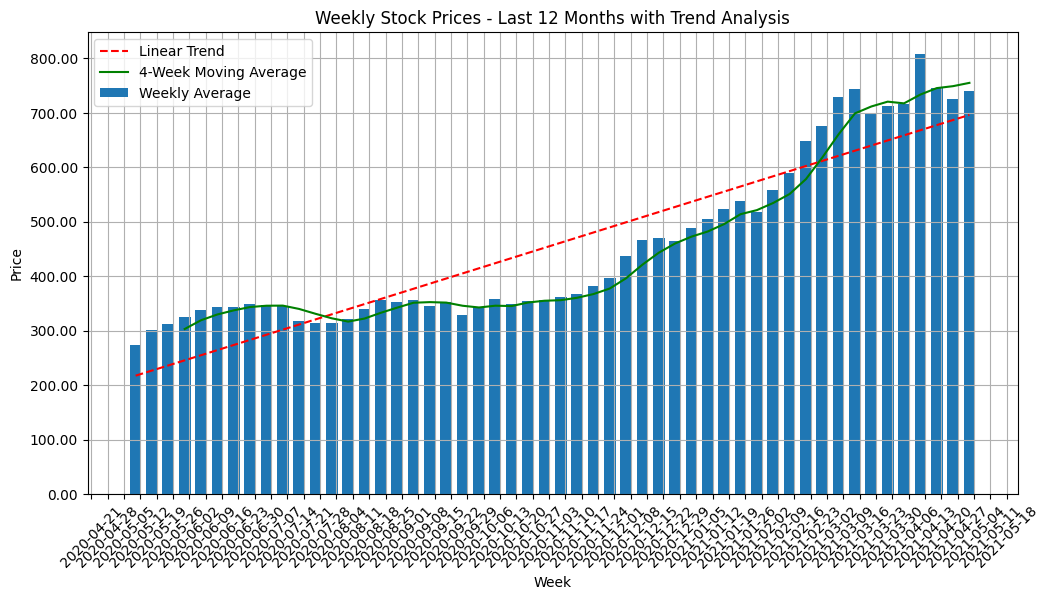

Trend Analysis Conclusion:
Slope of the Linear Trend: 1.3411
The stock price shows an upward trend over the last 12 months.
First value of the 4-week Moving Average: nan
Last value of the 4-week Moving Average: 754.99
The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(weekly_data.index)  # Convert dates to numeric values for regression
y = weekly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = weekly_data.rolling(window=4).mean()  # 4-week moving average

# Calculate the first and last values of the rolling mean for the analysis
first_rolling_mean = rolling_mean.iloc[0]
last_rolling_mean = rolling_mean.iloc[-1]

# Plotting (unchanged)
plt.figure(figsize=(12, 6))

# Create a bar graph for weekly average
bars = plt.bar(weekly_data.index, weekly_data, label='Weekly Average', width=5)

# Plot the trend line
plt.plot(weekly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(weekly_data.index, rolling_mean, color='green', label='4-Week Moving Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
# for bar in bars:
#     yval = bar.get_height()  # Get the height of each bar (price)
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=5)  # Reduced font size

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion with numerical data
print("Trend Analysis Conclusion:")
print(f"Slope of the Linear Trend: {slope:.4f}")  # Print slope value
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Print the first and last values of the rolling mean (4-week moving average)
print(f"First value of the 4-week Moving Average: {first_rolling_mean:.2f}")
print(f"Last value of the 4-week Moving Average: {last_rolling_mean:.2f}")

# Assess the moving average trend based on first and last values
if last_rolling_mean > first_rolling_mean:
    print("The 4-week moving average is trending upwards, indicating a recent positive momentum.")
elif last_rolling_mean < first_rolling_mean:
    print("The 4-week moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\2732273393.py:7: FutureWarning:

last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\2732273393.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14888\2732273393.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



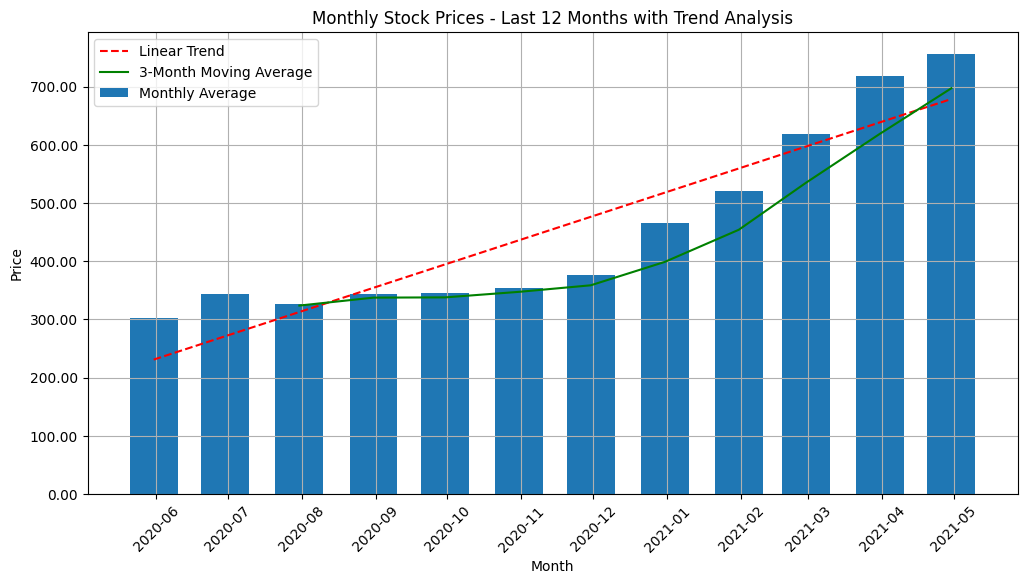

Trend Analysis Conclusion:
Slope of the Linear Trend: 1.3404
The stock price shows an upward trend over the last 12 months.
First value of the 3-month Moving Average: nan
Last value of the 3-month Moving Average: 697.32
The 3-month moving average has remained flat, showing no significant momentum in the recent months.


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(monthly_data.index)  # Convert dates to numeric values for regression
y = monthly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = monthly_data.rolling(window=3).mean()  # 3-month moving average

# Calculate the first and last values of the rolling mean for analysis
first_rolling_mean = rolling_mean.iloc[0]
last_rolling_mean = rolling_mean.iloc[-1]

plt.figure(figsize=(12, 6))

# Create a bar graph for monthly average
bars = plt.bar(monthly_data.index, monthly_data, label='Monthly Average', width=20)  # Adjust width for monthly bars

# Plot the trend line
plt.plot(monthly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(monthly_data.index, rolling_mean, color='green', label='3-Month Moving Average')

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion with numerical data
print("Trend Analysis Conclusion:")
print(f"Slope of the Linear Trend: {slope:.4f}")  # Print slope value
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Print the first and last values of the rolling mean (3-month moving average)
print(f"First value of the 3-month Moving Average: {first_rolling_mean:.2f}")
print(f"Last value of the 3-month Moving Average: {last_rolling_mean:.2f}")

# Assess the moving average trend based on first and last values
if last_rolling_mean > first_rolling_mean:
    print("The 3-month moving average is trending upwards, indicating a recent positive momentum.")
elif last_rolling_mean < first_rolling_mean:
    print("The 3-month moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 3-month moving average has remained flat, showing no significant momentum in the recent months.")
